In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure.figsize = (10.0,8.0)


data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    print(dict.keys())
    return dict[b'data'],dict[b'labels']

In [3]:
import numpy as np

root = r'cifar-10-batches-py/'

xs = []
ys = []

for i in range(1,6):
    f = root+'data_batch_'+str(i)
    X,y = unpickle(f)
    xs.append(X)
    ys.append(y)

X_train = np.concatenate(xs)
y_train = np.concatenate(ys)

X_test,y_test = unpickle(root + 'test_batch')

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [4]:
np.array(xs).shape,X_train.shape,y_train.shape,X_test.shape

((5, 10000, 3072), (50000, 3072), (50000,), (10000, 3072))

In [5]:
X_train = X_train.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("float")
X_test = X_test.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
X_train.shape

(50000, 32, 32, 3)

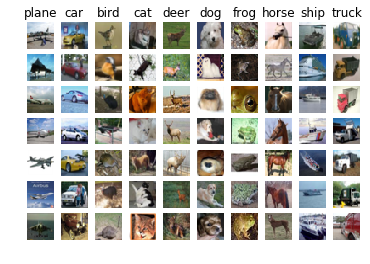

In [6]:
# view some pics
classes = ['plane', 'car', 'bird', 
           'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 
           'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    indexs = np.flatnonzero(y_train == y)
    indexs = np.random.choice(indexs, samples_per_class, replace=False)
    for i, idx in enumerate(indexs):
        plt_idx = i*num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if 0 == i:
            plt.title(cls)

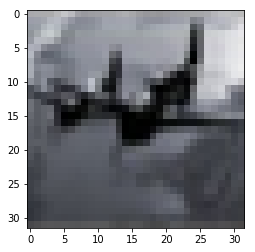

In [7]:
plt.imshow(X_train[42759].astype('uint8'))

In [8]:
X_train[0][:,:,0].shape

(32, 32)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [11]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, test_size=0.3)
X_tr.shape,X_val.shape

((35000, 3072), (15000, 3072))

[ 130.71074  136.05614  132.5538   130.14036  135.44238  131.85358
  131.05044  136.24616  132.58144  131.56886]


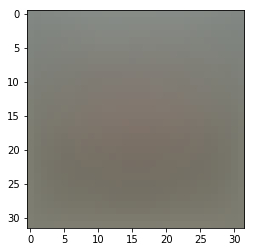

In [12]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape(32,32,3).astype('uint8'))

In [13]:
X_tr -= mean_image
X_val -= mean_image
X_test -= mean_image

In [15]:
# RFC Parameters tunning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {#"max_depth": [None],
              #"max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


#gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 6, verbose = 1)

RFC.fit(X_tr,y_tr)
#learning_curve(y_tr, RFC.predict(X_tr))
#gsRFC.fit(X_tr,y_tr)

#RFC_best = gsRFC.best_estimator_

# Best score
#gsRFC.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
accuracy_score(y_tr, RFC.predict(X_tr))

0.99380000000000002

In [18]:
accuracy_score(y_val, RFC.predict(X_val))

0.34466666666666668

In [19]:
accuracy_score(y_test, RFC.predict(X_test))

0.34710000000000002